<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/Dataset_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-processing

In [1]:
!pip install -q kaggle
!pip install -q patool


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 3.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split
import patoolib

# Data visualization
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from google.colab import files

In [ ]:
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data

In [3]:
data_dir = '/content/kaggle_data/data'
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

data_list = []
for category in categories:
    path = os.path.join(data_dir,category)
    for img_name in os.listdir(path):
        try:
          img_raw = cv2.imread(os.path.join(path,img_name))
          img_grey = cv2.imread(os.path.join(path,img_name),cv2.IMREAD_GRAYSCALE)

          # Append data to the list
          data_list.append({
              'category': category,
              'img_raw': img_raw,
              'img_grey': img_grey,
              'category_index': categories.index(category),
          })

        except Exception as e:
            pass

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

In [4]:
# drop missing values
df = df.dropna()
print("Missing values", df['img_raw'].isnull().sum())
# random sample from df
random_sample = df.sample(n=5, random_state=42)
# Display random sample
display(random_sample)

Missing values 0


,category,img_raw,img_grey,category_index
9223,shooting,"[[[68, 73, 76], [103, 108, 111], [95, 100, 103...","[[73, 108, 100, 94, 101, 96, 99, 98, 99, 99, 9...",14
2994,chess,"[[[47, 80, 66], [71, 106, 92], [68, 102, 91], ...","[[72, 98, 95, 100, 66, 10, 18, 143, 158, 164, ...",4
10259,swimming,"[[[221, 191, 78], [221, 191, 78], [219, 192, 7...","[[161, 161, 161, 161, 162, 162, 162, 162, 161,...",15
10914,table_tennis,"[[[97, 97, 97], [97, 97, 97], [97, 97, 97], [9...","[[97, 97, 97, 98, 98, 99, 99, 99, 98, 98, 98, ...",16
10709,table_tennis,"[[[161, 125, 65], [144, 108, 48], [126, 90, 30...","[[111, 94, 76, 70, 71, 72, 73, 74, 77, 77, 77,...",16


In [5]:
# resize images with grayscale into 100 * 100
img_size = 100
# Function to resize images
def resize_image(img_array, width, height):
    return cv2.resize(img_array,(img_size,img_size), 1)

def covert_to_rgb(img_raw):
    return cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

# df['img_raw'].apply(lambda x: covert_to_rgb(x))

# Resize images and append them as a new column
resized_img_raw = df['img_raw'].apply(lambda x: resize_image(x, img_size, img_size))
# df['resized_img_rgb'] = df['img_rgb'].apply(lambda x: resize_image(x, img_size, img_size))
resized_img_grey = df['img_grey'].apply(lambda x: resize_image(x, img_size, img_size))

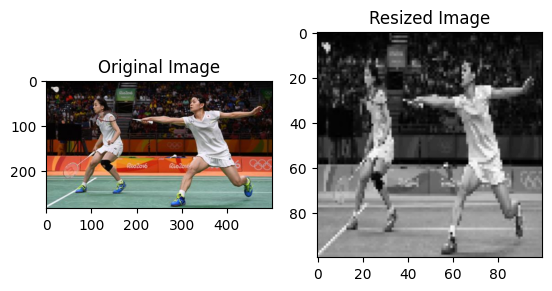

In [6]:
# Display the original and resized images for the first row
plt.subplot(1, 2, 1)
plt.imshow(covert_to_rgb(df['img_raw'][0]))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_grey[0], cmap='gray')
plt.title('Resized Image')

plt.show()

In [8]:
#create training data
training_data =[]

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array2,class_num])

            except Exception as e:
                pass


create_training_data()

In [19]:
df['one_hot_encoded'] = df['category_index'].apply(lambda x: to_categorical(x, num_classes=len(categories)))
display(df.head())

,category,img_raw,img_grey,category_index,one_hot_encoded
0,badminton,"[[[10, 10, 10], [8, 8, 8], [4, 4, 4], [3, 3, 3...","[[10, 8, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,badminton,"[[[191, 138, 211], [192, 139, 212], [192, 139,...","[[166, 167, 167, 168, 168, 167, 167, 166, 165,...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,badminton,"[[[251, 251, 251], [251, 251, 251], [251, 251,...","[[251, 251, 251, 251, 251, 251, 251, 251, 251,...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,badminton,"[[[14, 1, 0], [14, 1, 0], [14, 1, 0], [14, 1, ...","[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,badminton,"[[[133, 99, 69], [127, 93, 63], [123, 90, 57],...","[[94, 88, 84, 89, 98, 102, 97, 90, 87, 87, 89,...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
#shuffle all the training data
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample) #print first 5

In [ ]:
#creating lable and features

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
x=np.array(x).reshape(-1,img_size,img_size,1)

print("After converting into numpy array:")
y = np.array(y)

# normalize inputs from 0-255 to 0-1
x = x/255.0

## Save with Pickle

In [ ]:
#Optional Save the x and y

In [ ]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [ ]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)

## Train Test Split

In [ ]:
#create a split of data for the model fit and training
train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2, seed=22)

In [ ]:
test_y_cat = to_categorical(test_y)
train_y_cat = to_categorical(train_y)
print("one hot encoded for categorial")
print(train_y_cat[1])
print(len(train_y_cat[0]))




##Object Detection

In [ ]:
#Clone yolo 8 and check all dependencies
!pip install ultralytics
import ultralytics
ultralytics.checks()

In [ ]:
#Train YOLO8 model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=3, verbose=False)

In [ ]:
#Test model on images from test dataset
from IPython.display import Image
metrics = model.val()

In [ ]:
def obj_det(image_path):
  results = model(source=image_path,save=True, save_txt=True, project='runs/detect', name='predict', exist_ok=True)
  N = 12
  img_numb = image_path[-N:]
  return Image(filename='/content/runs/detect/predict/'+img_numb,width=600)

In [ ]:
obj_det('/content/kaggle_data/data/tennis/00000007.jpg')

In [ ]:
obj_det('/content/kaggle_data/data/formula1/00000023.jpg')

In [ ]:
obj_det('/content/kaggle_data/data/baseball/00000028.jpg')

In [ ]:
obj_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

#Building Classification model

In [ ]:
def create_training_data_2(df, resized_img_raw, resized_img_grey):
  IMAGE_SHAPE = (224, 224)
  BATCH_SIZE = 32

  #This is for resnet
  train_datagen_res = ImageDataGenerator(rescale=1/255.)
  test_datagen_res = ImageDataGenerator(rescale=1/255.)

  #This is for efficientNet, which does not require image rescaling.
  train_datagen_eff = ImageDataGenerator(rescale=None)
  test_datagen_eff = ImageDataGenerator(rescale=None)

  x = df[['img_raw', 'img_grey']]
  y = df['category_index']

  train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

  print("one hot encoded for categorial")
  test_y_cat = to_categorical(test_y)
  train_y_cat = to_categorical(train_y)

  print("type of x ", type(test_x))
  # print("value of test_x", test_x[0])
  print("type of y ", type(test_y))
  # print("value of test_x", test_y[0])
  print("type of test_y_cat", type(test_y_cat))
  print("value of test_y_cat", train_y_cat[1])

  # Convert image data to NumPy arrays
  train_x_raw = np.array(train_x['img_raw'].apply(lambda x: np.array(x)).tolist())
  test_x_raw = np.array(test_x['img_raw'].apply(lambda x: np.array(x)).tolist())

  train_x_grey = np.array(train_x['img_grey'].apply(lambda x: np.array(x)).tolist())
  test_x_grey = np.array(test_x['img_grey'].apply(lambda x: np.array(x)).tolist())

  print("Training images for ResNet:")
  train_data_res = train_datagen_res.flow(train_x_raw, train_y_cat, batch_size=BATCH_SIZE)

  print("Testing images for ResNet:")
  test_data_res = test_datagen_res.flow(test_x_raw, test_y_cat, batch_size=BATCH_SIZE)

  # Data augmentation for EfficientNet
  train_datagen_eff = ImageDataGenerator(rescale=None)
  test_datagen_eff = ImageDataGenerator(rescale=None)

  print("Training images for EfficientNet:")
  train_data_eff = train_datagen_eff.flow(train_x_grey, train_y_cat, batch_size=BATCH_SIZE)

  print("Testing images for EfficientNet:")
  test_data_eff = test_datagen_eff.flow(test_x_grey, test_y_cat, batch_size=BATCH_SIZE)

  return train_data_res, test_data_res, train_data_eff, test_data_eff

train_data_res, test_data_res, train_data_eff, test_data_eff = create_training_data_2(df, resized_img_raw, resized_img_grey)

one hot encoded for categorial
type of x  <class 'pandas.core.frame.DataFrame'>
type of y  <class 'pandas.core.series.Series'>
type of test_y_cat <class 'numpy.ndarray'>
value of test_y_cat [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [22]:
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(model_url, num_classes=len(categories)): #Since there are 7 output classes in this dataset
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(100,100)+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model